In [1]:
pip install umap-learn

     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 1.2MB 7.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=ddf6d610002b93f389541c12973c27ad13519c568b5a19abde01d17de7e76a5a
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=e4421261ad225336d19d77b82bd5176b9006741ec0ab196ad6c39febe3382185
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Collisions.csv to Collisions.csv


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Collisions.csv']))
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Number_of_Vehicles           Road_Type  ...  Engine_Capacity_(CC) Damage
0                   2    Dual carriageway  ...                  2496  Light
1                   2    Dual carriageway  ...                  1198  Light
2                   2  Single carriageway  ...                  1199  Light
3                   2  Single carriageway  ...                  1998  Light
4                   2  Single carriageway  ...                  1762  Light

[5 rows x 13 columns]
(37869, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       37869 non-null  int64 
 1   Road_Type                37869 non-null  object
 2   Speed_limit              37869 non-null  int64 
 3   Light_Conditions         37869 non-null  object
 4   Weather_Conditions       37869 non-null  object
 5   Road_Surface_Conditions 

In [5]:
dataset.head(1)

Number_of_Vehicles         Road_Type  ...  Engine_Capacity_(CC) Damage
0                   2  Dual carriageway  ...                  2496  Light

[1 rows x 13 columns]

In [6]:
# Converting categoring columns to numerical columns
dataset['Road_Type']= pd.factorize(dataset.Road_Type)[0] 
dataset['Light_Conditions']= pd.factorize(dataset.Light_Conditions)[0] 
dataset['Weather_Conditions']= pd.factorize(dataset.Weather_Conditions)[0] 
dataset['Road_Surface_Conditions']= pd.factorize(dataset.Road_Surface_Conditions)[0] 

dataset['Vehicle_Manoeuvre']= pd.factorize(dataset.Vehicle_Manoeuvre)[0] 
dataset['first_Point_of_Impact']= pd.factorize(dataset. first_Point_of_Impact)[0] 
dataset['Sex_of_Driver']= pd.factorize(dataset.Sex_of_Driver)[0] 
dataset['Damage']= pd.factorize(dataset.Damage)[0] 

In [7]:
dataset['Urban_or_Rural_Area']= pd.factorize(dataset.Urban_or_Rural_Area)[0] 


In [8]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [9]:
# Dropping columns with high correlation + causation
dataset = dataset.drop(['Road_Surface_Conditions'], axis = 1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Number_of_Vehicles     37869 non-null  int64
 1   Road_Type              37869 non-null  int64
 2   Speed_limit            37869 non-null  int64
 3   Light_Conditions       37869 non-null  int64
 4   Weather_Conditions     37869 non-null  int64
 5   Urban_or_Rural_Area    37869 non-null  int64
 6   Vehicle_Manoeuvre      37869 non-null  int64
 7   first_Point_of_Impact  37869 non-null  int64
 8   Sex_of_Driver          37869 non-null  int64
 9   Age_of_Driver          37869 non-null  int64
 10  Engine_Capacity_(CC)   37869 non-null  int64
 11  Damage                 37869 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB
None


In [10]:
# Creating dummy columns
categorical_features = ['Road_Type',]
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Number_of_Vehicles     37869 non-null  int64
 1   Speed_limit            37869 non-null  int64
 2   Light_Conditions       37869 non-null  int64
 3   Weather_Conditions     37869 non-null  int64
 4   Urban_or_Rural_Area    37869 non-null  int64
 5   Vehicle_Manoeuvre      37869 non-null  int64
 6   first_Point_of_Impact  37869 non-null  int64
 7   Sex_of_Driver          37869 non-null  int64
 8   Age_of_Driver          37869 non-null  int64
 9   Engine_Capacity_(CC)   37869 non-null  int64
 10  Damage                 37869 non-null  int64
 11  Road_Type_0            37869 non-null  uint8
 12  Road_Type_1            37869 non-null  uint8
 13  Road_Type_2            37869 non-null  uint8
 14  Road_Type_3            37869 non-null  uint8
 15  Road_Type_4            37869 non-nul

In [11]:
final_data.head(1)

Number_of_Vehicles  Speed_limit  ...  Road_Type_3  Road_Type_4
0                   2           40  ...            0            0

[1 rows x 16 columns]

In [12]:
# Dividing data into subsets
#driver info
subset1 = final_data[['Age_of_Driver', 'Sex_of_Driver','Number_of_Vehicles','Engine_Capacity_(CC)']]

#vehicle condiction
subset2 = final_data[['Speed_limit','Vehicle_Manoeuvre','Light_Conditions','Urban_or_Rural_Area']]

#damage info
subset3 = final_data[[ 'first_Point_of_Impact', 'Damage','Weather_Conditions']]

#Potential Churn factors
subset4 = final_data[['Speed_limit','Vehicle_Manoeuvre','Light_Conditions','Weather_Conditions','first_Point_of_Impact', 'Damage','Urban_or_Rural_Area']]

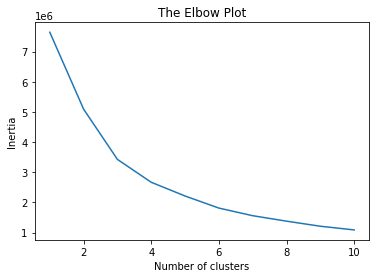

In [13]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)
X4 = feature_scaler.fit_transform(subset4)


# Analysis on subset1 - Personal Data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X1)

# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

Sex_of_Driver= list(dataset['Sex_of_Driver'])
Age_of_Driver = list(dataset['Age_of_Driver'])
Speed_limit = list(dataset['Speed_limit'])
Road_Surface_Conditions = list(dataset['Urban_or_Rural_Area'])
Light_Conditions = list(dataset['Light_Conditions'])
Damage = list(dataset['Damage'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Sex_of_Driver: {a};Age_of_Driver : {b}; Speed_limit:{c}, Urban_or_Rural_Area:{d}, Light_Conditions:{e}, Damage:{f}' for a,b,c,d,e,f in list(zip(Sex_of_Driver,Age_of_Driver,Speed_limit,Urban_or_Rural_Area,Light_Conditions,Damage))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()